<a href="https://colab.research.google.com/github/ZebraHead22/PolyPhotonics2021/blob/main/2nd_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model training (Runtime->Change runtime type->set "GPU")

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot

In [2]:
# Set seed for repeatable results
np.random.seed(42)

# Image size
img_rows, img_cols = 28, 28

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [3]:
# Set seed for repeatable results
np.random.seed(42)

# Image size
img_rows, img_cols = 28, 28

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [4]:
# Image size conversion (784x1 -> 28x28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Data normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert tags to categories
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [5]:
# Create a sequential model
model = Sequential()

model.add(Conv2D(75, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(100, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [6]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 75)        1950      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 75)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 100)         187600    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 100)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 100)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [7]:
# Train network
history = model.fit(X_train, Y_train, batch_size=200, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10
240/240 - 46s - loss: 0.2520 - accuracy: 0.9201 - val_loss: 0.0548 - val_accuracy: 0.9843
Epoch 2/10
240/240 - 3s - loss: 0.0656 - accuracy: 0.9793 - val_loss: 0.0380 - val_accuracy: 0.9882
Epoch 3/10
240/240 - 3s - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0356 - val_accuracy: 0.9901
Epoch 4/10
240/240 - 3s - loss: 0.0358 - accuracy: 0.9891 - val_loss: 0.0310 - val_accuracy: 0.9912
Epoch 5/10
240/240 - 3s - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0307 - val_accuracy: 0.9915
Epoch 6/10
240/240 - 3s - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.0345 - val_accuracy: 0.9901
Epoch 7/10
240/240 - 3s - loss: 0.0218 - accuracy: 0.9927 - val_loss: 0.0315 - val_accuracy: 0.9917
Epoch 8/10
240/240 - 3s - loss: 0.0197 - accuracy: 0.9934 - val_loss: 0.0278 - val_accuracy: 0.9912
Epoch 9/10
240/240 - 3s - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.0251 - val_accuracy: 0.9923
Epoch 10/10
240/240 - 3s - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.0287 - val_accuracy: 0.991

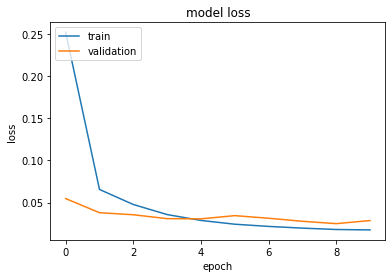

In [8]:
def plotLosses(history):  
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('model loss')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='upper left')
    pyplot.show()

plotLosses(history)

In [9]:
# We evaluate the quality of network training on test data
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 99.30%


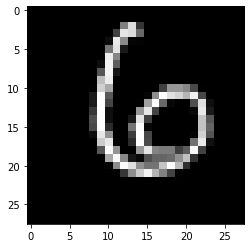

In [10]:
# Take an arbitrary index of the test sample
index_example = 100

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Draw an example
pyplot.imshow(X_test[index_example], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [12]:
# Data test normalization
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [13]:
# Make a prediction
img = X_test[index_example]
img = np.expand_dims(img, axis = 0)
prediction = model.predict(img)
print('Predicted value: ', np.argmax(prediction))

Predicted value:  1
